In [1]:
import pandas as pd
from pathlib import *
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np
import itertools
#from arcgis.features import GeoAccessor, GeoSeriesAccessor
from scipy.stats import pearsonr
#import geopandas as gpd
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import text
import pathlib
#import statsmodels.api as sm
#sns.set_theme()
import json
import glob
import dask.dataframe as dd
import datatable as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
folder_2019_2020=Path(r'agile\2019_2020FLCA')
folder_2019_2020

WindowsPath('D:/Safegraph_inno/agile/2019_2020FLCA')

In [3]:
%%time
#read files in the folder 2019 at once
dfs = {f.stem: pd.read_csv(f) for f in folder_2019_2020.glob('*.csv')}
#dfs

Wall time: 21.7 s


In [4]:
%%time
#assign variable names to be the same as file names
for name, df in dfs.items():
    locals()[name] = df

Wall time: 0 ns


In [5]:
%%time
#combine data frames
df_2019_2020 = pd.concat([wk1_2019, wk2_2019, wk3_2019,wk4_2019, wk5_2019,wk6_2019, wk7_2019, wk8_2019, wk9_2019,
                          wk1_2020, wk2_2020, wk3_2020,wk4_2020, wk5_2020,wk6_2020, wk7_2020, wk8_2020, wk9_2020],
                            axis=0)
df_2019_2020.head()

Wall time: 1.21 s


,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
2,101,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,50.0,15.0,"[3,7,5,8,9,9,9]",3274.0
3,104,229-222@5z5-3pn-x5z,Kaban Persian Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,34.129896,-118.348719,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,12.0,12.0,"[1,1,0,2,5,2,1]",7384.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0


In [6]:
df_2019_2020_CA= df_2019_2020.query('region =="CA"')
df_2019_2020_CA

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
2,101,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,50.0,15.0,"[3,7,5,8,9,9,9]",3274.0
3,104,229-222@5z5-3pn-x5z,Kaban Persian Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,34.129896,-118.348719,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,12.0,12.0,"[1,1,0,2,5,2,1]",7384.0
5,167,222-222@5vh-2xq-t7q,True Value Hardware,Building Material and Supplies Dealers,Hardware Stores,38.961495,-122.631765,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,14.0,14.0,"[2,2,1,1,1,5,2]",6047.0
7,183,zzw-222@5vg-5r7-c5z,New Hope Community,Religious Organizations,Religious Organizations,38.478253,-121.462456,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,47.0,11.0,"[10,9,13,6,6,1,2]",389.0
8,212,223-222@5z7-56h-fpv,San Benito High,Elementary and Secondary Schools,Elementary and Secondary Schools,36.840773,-121.404696,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,691.0,189.0,"[117,134,135,128,126,51,0]",2635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384668,12891903,zzw-222@5z4-mxt-m6k,Fraker Steven D DDS,Offices of Dentists,Offices of Dentists,34.108722,-117.651835,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,8.0,6.0,"[2,1,1,1,1,1,1]",2023.0
384669,12891958,zzw-222@5z6-3ct-pvz,Fresh Fruit Logistics,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,33.851206,-118.220377,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,59.0,38.0,"[16,12,7,9,9,5,1]",17803.0
384670,12891959,228-222@5z4-zc4-pgk,Rigos Taco 2,Restaurants and Other Eating Places,Full-Service Restaurants,34.179090,-118.430581,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,14.0,13.0,"[3,2,2,3,2,0,2]",2530.0
384672,12892151,22c-223@5z6-3qz-x3q,Glen's Kitchen,Restaurants and Other Eating Places,Full-Service Restaurants,34.014973,-118.256698,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,6.0,5.0,"[1,1,2,0,0,1,1]",430.0


In [8]:
#categories with atleast 100 POIs in top category

df_2019_2020_categories=df_2019_2020_CA.groupby('top_category')['location_name'].count()
categories_over100=df_2019_2020_categories[df_2019_2020_categories>=50]
#df_2019_categories #182 categories
categories_over100.sort_values(ascending=False)

top_category
Restaurants and Other Eating Places                          1447188
Other Amusement and Recreation Industries                     290245
Religious Organizations                                       247324
Museums, Historical Sites, and Similar Institutions           221939
Grocery Stores                                                189450
                                                              ...   
Insurance and Employee Benefit Funds                              69
Social Advocacy Organizations                                     69
Steel Product Manufacturing from Purchased Steel                  68
Metal and Mineral (except Petroleum) Merchant Wholesalers         59
Travel Arrangement and Reservation Services                       55
Name: location_name, Length: 153, dtype: int64

In [11]:
categories_over1001 = categories_over100.drop(labels = ['Business Schools and Computer and Management Training']) 
categories_over1001.sort_values(ascending=False)

top_category
Restaurants and Other Eating Places                          1447188
Other Amusement and Recreation Industries                     290245
Religious Organizations                                       247324
Museums, Historical Sites, and Similar Institutions           221939
Grocery Stores                                                189450
                                                              ...   
Social Advocacy Organizations                                     69
Insurance and Employee Benefit Funds                              69
Steel Product Manufacturing from Purchased Steel                  68
Metal and Mineral (except Petroleum) Merchant Wholesalers         59
Travel Arrangement and Reservation Services                       55
Name: location_name, Length: 152, dtype: int64

In [12]:
names_array=categories_over1001.index
names_array.sort_values(ascending=True)

Index(['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs',
       'Agencies, Brokerages, and Other Insurance Related Activities',
       'Amusement Parks and Arcades',
       'Apparel Accessories and Other Apparel Manufacturing',
       'Architectural, Engineering, and Related Services',
       'Automobile Dealers', 'Automotive Equipment Rental and Leasing',
       ...
       'Support Activities for Water Transportation',
       'Taxi and Limousine Service', 'Technical and Trade Schools',
       'Travel Arrangement and Reservation Services', 'Traveler Accommodation',
       'Used Merchandise Stores', 'Utility System Construction',
       'Warehousing and Storage', 'Waste Treatment and Disposal',
       'Wired and Wireless Telecommunications Carriers'],
      dtype='object', name='top_category', length=152)

In [13]:
wk1_2019_CA=wk1_2019.query('top_category in @names_array and region =="CA"')
wk2_2019_CA=wk2_2019.query('top_category in @names_array and region =="CA"')
wk3_2019_CA=wk3_2019.query('top_category in @names_array and region =="CA"')
wk4_2019_CA=wk4_2019.query('top_category in @names_array and region =="CA"')
wk5_2019_CA=wk5_2019.query('top_category in @names_array and region =="CA"')
wk6_2019_CA=wk6_2019.query('top_category in @names_array and region =="CA"')
wk7_2019_CA=wk7_2019.query('top_category in @names_array and region =="CA"')
wk8_2019_CA=wk8_2019.query('top_category in @names_array and region =="CA"')
wk9_2019_CA=wk9_2019.query('top_category in @names_array and region =="CA"')

wk1_2020_CA=wk1_2020.query('top_category in @names_array and region =="CA"')
wk2_2020_CA=wk2_2020.query('top_category in @names_array and region =="CA"')
wk3_2020_CA=wk3_2020.query('top_category in @names_array and region =="CA"')
wk4_2020_CA=wk4_2020.query('top_category in @names_array and region =="CA"')
wk5_2020_CA=wk5_2020.query('top_category in @names_array and region =="CA"')
wk6_2020_CA=wk6_2020.query('top_category in @names_array and region =="CA"')
wk7_2020_CA=wk7_2020.query('top_category in @names_array and region =="CA"')
wk8_2020_CA=wk8_2020.query('top_category in @names_array and region =="CA"')
wk9_2020_CA=wk9_2020.query('top_category in @names_array and region =="CA"')
wk1_2019_CA

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
2,101,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,50.0,15.0,"[3,7,5,8,9,9,9]",3274.0
3,104,229-222@5z5-3pn-x5z,Kaban Persian Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,34.129896,-118.348719,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,12.0,12.0,"[1,1,0,2,5,2,1]",7384.0
5,167,222-222@5vh-2xq-t7q,True Value Hardware,Building Material and Supplies Dealers,Hardware Stores,38.961495,-122.631765,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,14.0,14.0,"[2,2,1,1,1,5,2]",6047.0
7,183,zzw-222@5vg-5r7-c5z,New Hope Community,Religious Organizations,Religious Organizations,38.478253,-121.462456,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,47.0,11.0,"[10,9,13,6,6,1,2]",389.0
8,212,223-222@5z7-56h-fpv,San Benito High,Elementary and Secondary Schools,Elementary and Secondary Schools,36.840773,-121.404696,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,691.0,189.0,"[117,134,135,128,126,51,0]",2635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543090,12892122,zzw-222@5z7-stz-9vf,Matthew H Sciaroni DPM,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,36.836366,-119.768134,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,12.0,5.0,"[2,4,2,3,1,0,0]",6996.0
543091,12892126,22f-222@5vg-76m-nkf,Osteria Fasulo,Restaurants and Other Eating Places,Full-Service Restaurants,38.548440,-121.782264,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,25.0,18.0,"[2,3,4,3,4,4,5]",4862.0
543092,12892152,22p-222@5z7-sw5-g49,Cali Smoke Shop,Other Miscellaneous Store Retailers,Tobacco Stores,36.729098,-119.768382,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,53.0,43.0,"[4,6,9,7,11,7,9]",7143.0
543093,12892191,227-223@5z4-zwz-fmk,Rapha Los Angeles,"Sporting Goods, Hobby, and Musical Instrument ...",Sporting Goods Stores,34.017002,-118.495346,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,47.0,38.0,"[7,7,5,6,5,4,13]",17533.0


In [14]:
from scipy.stats import shapiro
#if the p-value is 0.0001 which is less than the alpha(0.05) then we reject the null hypothesis i.e.
#we have sufficient evidence to say that sample does not come from a normal distribution. therefore ttest not appropiate
 
wk1_2019_shap=shapiro(wk1_2019_CA['raw_visit_counts'])[1]
wk1_2020_shap=shapiro(wk1_2020_CA['raw_visit_counts'])[1]
 
wk2_2019_shap=shapiro(wk2_2019_CA['raw_visit_counts'])[1]
wk2_2020_shap=shapiro(wk2_2020_CA['raw_visit_counts'])[1]

 
wk3_2019_shap=shapiro(wk3_2019_CA['raw_visit_counts'])[1]
wk3_2020_shap=shapiro(wk3_2020_CA['raw_visit_counts'])[1]
 
wk4_2019_shap=shapiro(wk4_2019_CA['raw_visit_counts'])[1]
wk4_2020_shap=shapiro(wk4_2020_CA['raw_visit_counts'])[1]
 
wk5_2019_shap=shapiro(wk5_2019_CA['raw_visit_counts'])[1]
wk5_2020_shap=shapiro(wk5_2020_CA['raw_visit_counts'])[1]
 
wk6_2019_shap=shapiro(wk6_2019_CA['raw_visit_counts'])[1]
wk6_2020_shap=shapiro(wk6_2020_CA['raw_visit_counts'])[1]
 
wk7_2019_shap=shapiro(wk7_2019_CA['raw_visit_counts'])[1]
wk7_2020_shap=shapiro(wk7_2020_CA['raw_visit_counts'])[1]
 
wk8_2019_shap=shapiro(wk8_2019_CA['raw_visit_counts'])[1]
wk8_2020_shap=shapiro(wk8_2020_CA['raw_visit_counts'])[1]
 
wk9_2019_shap=shapiro(wk9_2019_CA['raw_visit_counts'])[1]
wk9_2020_shap=shapiro(wk9_2020_CA['raw_visit_counts'])[1]



print('Wk1_19=',wk1_2019_shap, '\n',"Wk1_20=",wk1_2020_shap, '\n', "Wk2_19=",wk2_2019_shap, '\n',
     'Wk2_20=',wk2_2020_shap, '\n',"Wk3_19=",wk3_2019_shap, '\n', "Wk3_20=",wk3_2020_shap, '\n',
     'Wk4_19=',wk4_2019_shap, '\n',"Wk4_20=",wk4_2020_shap, '\n', "Wk5_19=",wk5_2019_shap,'\n'
     'Wk5_20=',wk5_2020_shap, '\n',"Wk6_19=",wk6_2019_shap, '\n', "Wk6_20=",wk6_2020_shap, '\n'
     'Wk7_19=',wk7_2019_shap, '\n',"Wk7_20=",wk7_2020_shap, '\n', "Wk8_19=",wk8_2019_shap, '\n'
     'Wk8_20=',wk8_2020_shap, '\n',"Wk9_19=",wk9_2019_shap, '\n', "Wk9_20=",wk9_2020_shap)

Wk1_19= 0.0 
 Wk1_20= 0.0 
 Wk2_19= 0.0 
 Wk2_20= 0.0 
 Wk3_19= 0.0 
 Wk3_20= 0.0 
 Wk4_19= 0.0 
 Wk4_20= 0.0 
 Wk5_19= 0.0 
Wk5_20= 0.0 
 Wk6_19= 0.0 
 Wk6_20= 0.0 
Wk7_19= 0.0 
 Wk7_20= 0.0 
 Wk8_19= 0.0 
Wk8_20= 0.0 
 Wk9_19= 0.0 
 Wk9_20= 0.0


In [15]:
from scipy.stats import levene
#if the p-value is 0.0001 which is less than the alpha(0.05) then we reject the null hypothesis i.e.
#we have sufficient evidence to say that sample does not come from a normal distribution, that is variance are not
#equal. therefore ttest not appropiate
wk1=levene(wk1_2019_CA['raw_visit_counts'], wk1_2020_CA['raw_visit_counts'])
wk2=levene(wk2_2019_CA['raw_visit_counts'], wk2_2020_CA['raw_visit_counts'])
wk3=levene(wk3_2019_CA['raw_visit_counts'], wk3_2020_CA['raw_visit_counts'])
wk4=levene(wk4_2019_CA['raw_visit_counts'], wk4_2020_CA['raw_visit_counts'])

wk5=levene(wk5_2019_CA['raw_visit_counts'], wk5_2020_CA['raw_visit_counts'])
wk6=levene(wk6_2019_CA['raw_visit_counts'], wk6_2020_CA['raw_visit_counts'])
wk7=levene(wk7_2019_CA['raw_visit_counts'], wk7_2020_CA['raw_visit_counts'])
wk8=levene(wk8_2019_CA['raw_visit_counts'], wk8_2020_CA['raw_visit_counts'])

wk9=levene(wk9_2019_CA['raw_visit_counts'], wk9_2020_CA['raw_visit_counts'])

print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)


Wk1= LeveneResult(statistic=129.49178823035095, pvalue=5.328133461496146e-30) 
 Wk2= LeveneResult(statistic=2.011967566776616, pvalue=0.15606329095525082) 
 Wk3= LeveneResult(statistic=1293.886598708077, pvalue=5.0596819014692055e-283) 
 Wk4= LeveneResult(statistic=1104.7246248283911, pvalue=5.426881149223627e-242) 
 Wk5= LeveneResult(statistic=1426.2020538779932, pvalue=1.068421673713e-311) 
 Wk6= LeveneResult(statistic=1939.5973250114957, pvalue=0.0) 
Wk7= LeveneResult(statistic=1732.892157118753, pvalue=0.0) 
 Wk8= LeveneResult(statistic=1657.4429722351213, pvalue=0.0) 
 Wk9= LeveneResult(statistic=1965.6153550915094, pvalue=0.0)


In [16]:
from scipy.stats import ttest_ind
#T-tests are parametric tests:independent and continuous, normally distributed, 
# randomly sampled equal variance in the grps
#A t-statistic close to zero represents the lowest evidence against the hypothesis.  
#A larger t-statistic value represents strong evidence against the hypothesis.
wk1=ttest_ind(wk1_2019_CA['raw_visit_counts'], wk1_2020_CA['raw_visit_counts'])
wk2=ttest_ind(wk2_2019_CA['raw_visit_counts'], wk2_2020_CA['raw_visit_counts'])
wk3=ttest_ind(wk3_2019_CA['raw_visit_counts'], wk3_2020_CA['raw_visit_counts'])
wk4=ttest_ind(wk4_2019_CA['raw_visit_counts'], wk4_2020_CA['raw_visit_counts'])

wk5=ttest_ind(wk5_2019_CA['raw_visit_counts'], wk5_2020_CA['raw_visit_counts'])
wk6=ttest_ind(wk6_2019_CA['raw_visit_counts'], wk6_2020_CA['raw_visit_counts'])
wk7=ttest_ind(wk7_2019_CA['raw_visit_counts'], wk7_2020_CA['raw_visit_counts'])
wk8=ttest_ind(wk8_2019_CA['raw_visit_counts'], wk8_2020_CA['raw_visit_counts'])

wk9=ttest_ind(wk9_2019_CA['raw_visit_counts'], wk9_2020_CA['raw_visit_counts'])

print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= Ttest_indResult(statistic=-10.814604603413647, pvalue=2.951241384670076e-27) 
 Wk2= Ttest_indResult(statistic=3.489752391169435, pvalue=0.0004835007969460752) 
 Wk3= Ttest_indResult(statistic=44.01163068830743, pvalue=0.0) 
 Wk4= Ttest_indResult(statistic=39.26349363190795, pvalue=0.0) 
 Wk5= Ttest_indResult(statistic=46.25489278590823, pvalue=0.0) 
 Wk6= Ttest_indResult(statistic=53.89029916415711, pvalue=0.0) 
Wk7= Ttest_indResult(statistic=51.758984235274724, pvalue=0.0) 
 Wk8= Ttest_indResult(statistic=48.98787836712216, pvalue=0.0) 
 Wk9= Ttest_indResult(statistic=53.09084059187691, pvalue=0.0)


In [17]:
#used when sample sizes vary between two groups, non-parametric test that can be used in place of an unpaired t-test.
#H0: The weighted_dist is equal between the two groups
#HA: The weighted_dist is not equal between the two groups
#If the p-value is less than 0.05, then the weighted_dist are different and H0 is reject
#IF p<0.05= medians are significantly different from each other 

#A one-tailed test looks for an “increase” or “decrease” in the parameter 
#whereas a two-tailed test looks for a “change” (could be increase or decrease) in the parameter.


from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_CA['raw_visit_counts'], wk1_2020_CA['raw_visit_counts'],alternative='two-sided')
wk2=mannwhitneyu(wk2_2019_CA['raw_visit_counts'], wk2_2020_CA['raw_visit_counts'],alternative='two-sided')
wk3=mannwhitneyu(wk3_2019_CA['raw_visit_counts'], wk3_2020_CA['raw_visit_counts'],alternative='two-sided')
wk4=mannwhitneyu(wk4_2019_CA['raw_visit_counts'], wk4_2020_CA['raw_visit_counts'],alternative='two-sided')

wk5=mannwhitneyu(wk5_2019_CA['raw_visit_counts'], wk5_2020_CA['raw_visit_counts'],alternative='two-sided')
wk6=mannwhitneyu(wk6_2019_CA['raw_visit_counts'], wk6_2020_CA['raw_visit_counts'],alternative='two-sided')
wk7=mannwhitneyu(wk7_2019_CA['raw_visit_counts'], wk7_2020_CA['raw_visit_counts'],alternative='two-sided')
wk8=mannwhitneyu(wk8_2019_CA['raw_visit_counts'], wk8_2020_CA['raw_visit_counts'],alternative='two-sided')

wk9=mannwhitneyu(wk9_2019_CA['raw_visit_counts'], wk9_2020_CA['raw_visit_counts'],alternative='two-sided')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=53507270950.5, pvalue=8.201408159016495e-05) 
 Wk2= MannwhitneyuResult(statistic=53628983615.0, pvalue=6.947766568512351e-272) 
 Wk3= MannwhitneyuResult(statistic=48502661346.5, pvalue=0.0) 
 Wk4= MannwhitneyuResult(statistic=42500301853.5, pvalue=0.0) 
 Wk5= MannwhitneyuResult(statistic=46484274995.5, pvalue=0.0) 
 Wk6= MannwhitneyuResult(statistic=42324669203.0, pvalue=0.0) 
Wk7= MannwhitneyuResult(statistic=42673069472.0, pvalue=0.0) 
 Wk8= MannwhitneyuResult(statistic=44742653919.0, pvalue=0.0) 
 Wk9= MannwhitneyuResult(statistic=51012273216.5, pvalue=0.0)


In [18]:
#‘less’: the distribution underlying weighted_dist 2019 is 
#stochastically less than the distribution weghted_dist 2020.
# if p<0.005, means that weighted_dist 2019 is significantly less than the genotype weghted_dist 2020.

from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_CA['raw_visit_counts'], wk1_2020_CA['raw_visit_counts'],alternative='less')
wk2=mannwhitneyu(wk2_2019_CA['raw_visit_counts'], wk2_2020_CA['raw_visit_counts'],alternative='less')
wk3=mannwhitneyu(wk3_2019_CA['raw_visit_counts'], wk3_2020_CA['raw_visit_counts'],alternative='less')
wk4=mannwhitneyu(wk4_2019_CA['raw_visit_counts'], wk4_2020_CA['raw_visit_counts'],alternative='less')

wk5=mannwhitneyu(wk5_2019_CA['raw_visit_counts'], wk5_2020_CA['raw_visit_counts'],alternative='less')
wk6=mannwhitneyu(wk6_2019_CA['raw_visit_counts'], wk6_2020_CA['raw_visit_counts'],alternative='less')
wk7=mannwhitneyu(wk7_2019_CA['raw_visit_counts'], wk7_2020_CA['raw_visit_counts'],alternative='less')
wk8=mannwhitneyu(wk8_2019_CA['raw_visit_counts'], wk8_2020_CA['raw_visit_counts'],alternative='less')

wk9=mannwhitneyu(wk9_2019_CA['raw_visit_counts'], wk9_2020_CA['raw_visit_counts'],alternative='less')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=53507270950.5, pvalue=0.9999589929614512) 
 Wk2= MannwhitneyuResult(statistic=53628983615.0, pvalue=1.0) 
 Wk3= MannwhitneyuResult(statistic=48502661346.5, pvalue=1.0) 
 Wk4= MannwhitneyuResult(statistic=42500301853.5, pvalue=1.0) 
 Wk5= MannwhitneyuResult(statistic=46484274995.5, pvalue=1.0) 
 Wk6= MannwhitneyuResult(statistic=42324669203.0, pvalue=1.0) 
Wk7= MannwhitneyuResult(statistic=42673069472.0, pvalue=1.0) 
 Wk8= MannwhitneyuResult(statistic=44742653919.0, pvalue=1.0) 
 Wk9= MannwhitneyuResult(statistic=51012273216.5, pvalue=1.0)


In [19]:
#‘less’: the distribution underlying weighted_dist 2019 is 
#stochastically less than the distribution weghted_dist 2020.
# if p<0.005, means that weighted_dist 2019 is significantly less than the genotype weghted_dist 2020.

from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_CA['raw_visit_counts'], wk1_2020_CA['raw_visit_counts'],alternative='greater')
wk2=mannwhitneyu(wk2_2019_CA['raw_visit_counts'], wk2_2020_CA['raw_visit_counts'],alternative='greater')
wk3=mannwhitneyu(wk3_2019_CA['raw_visit_counts'], wk3_2020_CA['raw_visit_counts'],alternative='greater')
wk4=mannwhitneyu(wk4_2019_CA['raw_visit_counts'], wk4_2020_CA['raw_visit_counts'],alternative='greater')

wk5=mannwhitneyu(wk5_2019_CA['raw_visit_counts'], wk5_2020_CA['raw_visit_counts'],alternative='greater')
wk6=mannwhitneyu(wk6_2019_CA['raw_visit_counts'], wk6_2020_CA['raw_visit_counts'],alternative='greater')
wk7=mannwhitneyu(wk7_2019_CA['raw_visit_counts'], wk7_2020_CA['raw_visit_counts'],alternative='greater')
wk8=mannwhitneyu(wk8_2019_CA['raw_visit_counts'], wk8_2020_CA['raw_visit_counts'],alternative='greater')

wk9=mannwhitneyu(wk9_2019_CA['raw_visit_counts'], wk9_2020_CA['raw_visit_counts'],alternative='greater')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=53507270950.5, pvalue=4.100704079508248e-05) 
 Wk2= MannwhitneyuResult(statistic=53628983615.0, pvalue=3.4738832842561754e-272) 
 Wk3= MannwhitneyuResult(statistic=48502661346.5, pvalue=0.0) 
 Wk4= MannwhitneyuResult(statistic=42500301853.5, pvalue=0.0) 
 Wk5= MannwhitneyuResult(statistic=46484274995.5, pvalue=0.0) 
 Wk6= MannwhitneyuResult(statistic=42324669203.0, pvalue=0.0) 
Wk7= MannwhitneyuResult(statistic=42673069472.0, pvalue=0.0) 
 Wk8= MannwhitneyuResult(statistic=44742653919.0, pvalue=0.0) 
 Wk9= MannwhitneyuResult(statistic=51012273216.5, pvalue=0.0)


In [20]:
for j in names_array:
    i=str(j)
    print(i)

Accounting, Tax Preparation, Bookkeeping, and Payroll Services
Activities Related to Credit Intermediation
Activities Related to Real Estate
Administration of Economic Programs
Agencies, Brokerages, and Other Insurance Related Activities
Amusement Parks and Arcades
Apparel Accessories and Other Apparel Manufacturing
Architectural, Engineering, and Related Services
Automobile Dealers
Automotive Equipment Rental and Leasing
Automotive Parts, Accessories, and Tire Stores
Automotive Repair and Maintenance
Bakeries and Tortilla Manufacturing
Beer, Wine, and Liquor Stores
Beverage Manufacturing
Book Stores and News Dealers
Building Equipment Contractors
Building Finishing Contractors
Building Material and Supplies Dealers
Business Support Services
Cable and Other Subscription Programming
Chemical and Allied Products Merchant Wholesalers
Child Day Care Services
Civic and Social Organizations
Clay Product and Refractory Manufacturing
Clothing Stores
Coating, Engraving, Heat Treating, and Allie

In [21]:
from scipy import stats
for j in names_array:
    i=str(j)
    print(i)
    #data.query(f'{x} == "a"') 
    #filtered_df = df.query(f'top_category == "{value}"')
    a1 = wk1_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b1 = wk1_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a2 = wk2_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b2 = wk2_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a3 = wk3_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b3 = wk3_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a4 = wk4_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b4 = wk4_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a5 = wk5_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b5 = wk5_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a6 = wk6_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b6 = wk6_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a7 = wk7_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b7 = wk7_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a8 = wk8_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b8 = wk8_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a9 = wk9_2019_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b9 = wk9_2020_CA.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    wk1 = stats.mannwhitneyu(a1, b1, alternative='greater')[1].round(2)
    
    wk2 = stats.mannwhitneyu(a2, b2, alternative='greater')[1].round(2)
    
    wk3 = stats.mannwhitneyu(a3, b3, alternative='greater')[1].round(2)
    
    wk4 = stats.mannwhitneyu(a4, b4, alternative='greater')[1].round(2)
    
    wk5 = stats.mannwhitneyu(a5, b5, alternative='greater')[1].round(2)
    
    wk6 = stats.mannwhitneyu(a6, b6, alternative='greater')[1].round(2)
    
    wk7 = stats.mannwhitneyu(a7, b7, alternative='greater')[1].round(2)
    
    wk8 = stats.mannwhitneyu(a8, b8, alternative='greater')[1].round(2)
    wk9 = stats.mannwhitneyu(a9, b9, alternative='greater')[1].round(2)
    
    print('Wk1=', wk1, '\n', "Wk2=", wk2, '\n', "Wk3=", wk3, '\n',
    'Wk4=', wk4, '\n', "Wk5=", wk5, '\n', "Wk6=", wk6, '\n'
    'Wk7=', wk7, '\n', "Wk8=", wk8, '\n', "Wk9=", wk9)
    weekdict = {}
    weeknum = ['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9']
    weekres = [wk1, wk2, wk3, wk4, wk5, wk6, wk7, wk8, wk9]
    poi = i
    
    for key in weeknum:
        for value in weekres:
            weekdict[key] = value
            weekres.remove(value)
            break
    print(weekdict)
    weekdict['poi'] = poi
    #weekdict['one_tail_test'] = 'is2019greaterthan2020'

    df = pd.DataFrame.from_dict(weekdict, orient='index')
    df = df.transpose()

    df.to_csv(poi+'CA_onetail_is2019greater.csv', index=False, encoding="utf-8")


Accounting, Tax Preparation, Bookkeeping, and Payroll Services
Wk1= 0.29 
 Wk2= 0.26 
 Wk3= 0.22 
 Wk4= 0.16 
 Wk5= 0.22 
 Wk6= 0.07 
Wk7= 0.12 
 Wk8= 0.09 
 Wk9= 0.33
{'wk1': 0.29, 'wk2': 0.26, 'wk3': 0.22, 'wk4': 0.16, 'wk5': 0.22, 'wk6': 0.07, 'wk7': 0.12, 'wk8': 0.09, 'wk9': 0.33}
Activities Related to Credit Intermediation
Wk1= 0.22 
 Wk2= 0.46 
 Wk3= 0.0 
 Wk4= 0.02 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.22, 'wk2': 0.46, 'wk3': 0.0, 'wk4': 0.02, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Activities Related to Real Estate
Wk1= 0.01 
 Wk2= 0.01 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.01, 'wk2': 0.01, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Administration of Economic Programs
Wk1= 0.64 
 Wk2= 0.64 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.64, 'wk2': 0.64, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 

Wk1= 0.26 
 Wk2= 0.28 
 Wk3= 0.02 
 Wk4= 0.12 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.26, 'wk2': 0.28, 'wk3': 0.02, 'wk4': 0.12, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Department Stores
Wk1= 0.82 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.82, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Depository Credit Intermediation
Wk1= 0.76 
 Wk2= 0.27 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.76, 'wk2': 0.27, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Direct Selling Establishments
Wk1= 0.83 
 Wk2= 0.65 
 Wk3= 0.45 
 Wk4= 0.63 
 Wk5= 0.03 
 Wk6= 0.03 
Wk7= 0.01 
 Wk8= 0.06 
 Wk9= 0.02
{'wk1': 0.83, 'wk2': 0.65, 'wk3': 0.45, 'wk4': 0.63, 'wk5': 0.03, 'wk6': 0.03, 'wk7': 0.01, 'wk8': 0.06, 'wk9': 0.02}
Drinking Places (Alcoholic Beverages)
Wk1= 0.0 
 Wk2= 0.0 
 Wk3= 0.

Wk1= 0.13 
 Wk2= 0.22 
 Wk3= 0.04 
 Wk4= 0.22 
 Wk5= 0.24 
 Wk6= 0.21 
Wk7= 0.04 
 Wk8= 0.01 
 Wk9= 0.03
{'wk1': 0.13, 'wk2': 0.22, 'wk3': 0.04, 'wk4': 0.22, 'wk5': 0.24, 'wk6': 0.21, 'wk7': 0.04, 'wk8': 0.01, 'wk9': 0.03}
Individual and Family Services
Wk1= 0.65 
 Wk2= 0.09 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.65, 'wk2': 0.09, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Insurance Carriers
Wk1= 0.27 
 Wk2= 0.43 
 Wk3= 0.01 
 Wk4= 0.34 
 Wk5= 0.36 
 Wk6= 0.19 
Wk7= 0.34 
 Wk8= 0.32 
 Wk9= 0.01
{'wk1': 0.27, 'wk2': 0.43, 'wk3': 0.01, 'wk4': 0.34, 'wk5': 0.36, 'wk6': 0.19, 'wk7': 0.34, 'wk8': 0.32, 'wk9': 0.01}
Insurance and Employee Benefit Funds
Wk1= 0.61 
 Wk2= 0.66 
 Wk3= 0.23 
 Wk4= 0.24 
 Wk5= 0.24 
 Wk6= 0.3 
Wk7= 0.24 
 Wk8= 0.19 
 Wk9= 0.15
{'wk1': 0.61, 'wk2': 0.66, 'wk3': 0.23, 'wk4': 0.24, 'wk5': 0.24, 'wk6': 0.3, 'wk7': 0.24, 'wk8': 0.19, 'wk9': 0.15}
Interurban and Rural Bus Transportati

Wk1= 0.65 
 Wk2= 0.28 
 Wk3= 0.32 
 Wk4= 0.13 
 Wk5= 0.05 
 Wk6= 0.04 
Wk7= 0.14 
 Wk8= 0.22 
 Wk9= 0.11
{'wk1': 0.65, 'wk2': 0.28, 'wk3': 0.32, 'wk4': 0.13, 'wk5': 0.05, 'wk6': 0.04, 'wk7': 0.14, 'wk8': 0.22, 'wk9': 0.11}
Other Information Services
Wk1= 0.39 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.39, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Miscellaneous Manufacturing
Wk1= 0.89 
 Wk2= 0.88 
 Wk3= 0.07 
 Wk4= 0.34 
 Wk5= 0.06 
 Wk6= 0.05 
Wk7= 0.04 
 Wk8= 0.01 
 Wk9= 0.04
{'wk1': 0.89, 'wk2': 0.88, 'wk3': 0.07, 'wk4': 0.34, 'wk5': 0.06, 'wk6': 0.05, 'wk7': 0.04, 'wk8': 0.01, 'wk9': 0.04}
Other Miscellaneous Store Retailers
Wk1= 0.52 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.52, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Motor Vehicle Dealers
Wk1= 0.38 
 Wk2

Wk1= 0.29 
 Wk2= 0.05 
 Wk3= 0.0 
 Wk4= 0.03 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.29, 'wk2': 0.05, 'wk3': 0.0, 'wk4': 0.03, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Specialty Food Stores
Wk1= 0.08 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.08, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Spectator Sports
Wk1= 0.66 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.66, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Sporting Goods, Hobby, and Musical Instrument Stores
Wk1= 0.23 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.23, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Steel Product Manufacturing from Purchased Steel
Wk1= 0.34 
 Wk2= 0.34 
 Wk3

In [23]:
import os
import glob
import pandas as pd



path = r'Desktop\2019flca' # use your path
all_files = glob.glob(path + "/*CA_onetail_is2019greater.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv('CApoi_rawcounts_results_onetail_is2019greater.csv', encoding='utf-8')

In [24]:
CA_rawcounts2019grt=pd.read_csv('CApoi_rawcounts_results_onetail_is2019greater.csv', index_col='poi')
CA_rawcounts2019grt

,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.29,0.26,0.22,0.16,0.22,0.07,0.12,0.09,0.33
Activities Related to Credit Intermediation,0.22,0.46,0.00,0.02,0.00,0.00,0.00,0.00,0.00
Activities Related to Real Estate,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Administration of Economic Programs,0.64,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"Agencies, Brokerages, and Other Insurance Related Activities",0.21,0.20,0.00,0.09,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
Used Merchandise Stores,0.90,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Utility System Construction,0.62,0.45,0.67,0.62,0.12,0.26,0.57,0.18,0.52
Warehousing and Storage,0.67,0.52,0.79,0.88,0.53,0.73,0.48,0.63,0.29


In [25]:
CA_rawcounts2019grt_1=CA_rawcounts2019grt.iloc[:, 2:]
CA_rawcounts2019grt_1

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.22,0.16,0.22,0.07,0.12,0.09,0.33
Activities Related to Credit Intermediation,0.00,0.02,0.00,0.00,0.00,0.00,0.00
Activities Related to Real Estate,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Administration of Economic Programs,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"Agencies, Brokerages, and Other Insurance Related Activities",0.00,0.09,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
Used Merchandise Stores,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Utility System Construction,0.67,0.62,0.12,0.26,0.57,0.18,0.52
Warehousing and Storage,0.79,0.88,0.53,0.73,0.48,0.63,0.29


In [26]:
#none_essesntial services where 2019 raw vists are greater than 2020
CA_rawcounts2019grtsig= CA_rawcounts2019grt_1[CA_rawcounts2019grt_1<=0.05]
CA_rawcounts2019grtsig_7ness=CA_rawcounts2019grtsig.dropna(thresh=7)
CA_rawcounts2019grtsig_7ness

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
Activities Related to Credit Intermediation,0.00,0.02,0.0,0.0,0.0,0.0,0.0
Activities Related to Real Estate,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Administration of Economic Programs,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Amusement Parks and Arcades,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Automobile Dealers,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
"Sporting Goods, Hobby, and Musical Instrument Stores",0.00,0.00,0.0,0.0,0.0,0.0,0.0
Technical and Trade Schools,0.03,0.02,0.0,0.0,0.0,0.0,0.0
Traveler Accommodation,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [27]:
#essential services where 2019 raw vists are greater than 2020
CA_rawcounts2019grtsig= CA_rawcounts2019grt_1[CA_rawcounts2019grt_1>=0.05]
CA_rawcounts2019grtsig_7ess=CA_rawcounts2019grtsig.dropna(thresh=7)
CA_rawcounts2019grtsig_7ess

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.22,0.16,0.22,0.07,0.12,0.09,0.33
Building Finishing Contractors,0.61,0.39,0.57,0.55,0.28,0.10,0.20
Electrical Equipment Manufacturing,0.16,0.07,0.20,0.05,0.07,0.22,0.17
Freight Transportation Arrangement,0.47,0.70,0.29,0.20,0.12,0.16,0.48
Grocery and Related Product Merchant Wholesalers,0.60,0.60,0.41,0.27,0.23,0.23,0.09
Insurance and Employee Benefit Funds,0.23,0.24,0.24,0.30,0.24,0.19,0.15
Metal and Mineral (except Petroleum) Merchant Wholesalers,0.50,0.57,0.44,0.57,0.20,0.40,0.20
Miscellaneous Nondurable Goods Merchant Wholesalers,0.24,0.71,0.16,0.09,0.28,0.12,0.26
Motor Vehicle Manufacturing,0.30,0.60,0.49,0.06,0.06,0.16,0.06


In [28]:
df_2019CA= pd.concat([wk3_2019,wk4_2019, wk5_2019,wk6_2019, wk7_2019, wk8_2019, wk9_2019], axis=0)

df_2019CA= df_2019CA.query('region =="CA"')
df_2019CA.head()

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,1,22j-222@5xs-cqm-w6k,Nacho Bizness,Restaurants and Other Eating Places,Full-Service Restaurants,36.613733,-121.902136,CA,2019-03-18T00:00:00-07:00,2019-03-25T00:00:00-07:00,11.0,11.0,"[0,1,1,4,0,3,2]",10106.0
4,99,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2019-03-18T00:00:00-07:00,2019-03-25T00:00:00-07:00,63.0,18.0,"[11,7,7,6,13,10,9]",8103.0
5,102,229-222@5z5-3pn-x5z,Kaban Persian Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,34.129896,-118.348719,CA,2019-03-18T00:00:00-07:00,2019-03-25T00:00:00-07:00,9.0,9.0,"[1,2,0,2,4,0,0]",5548.0
8,181,zzw-222@5vg-5r7-c5z,New Hope Community,Religious Organizations,Religious Organizations,38.478253,-121.462456,CA,2019-03-18T00:00:00-07:00,2019-03-25T00:00:00-07:00,52.0,16.0,"[8,12,11,4,10,3,4]",6383.0
9,210,223-222@5z7-56h-fpv,San Benito High,Elementary and Secondary Schools,Elementary and Secondary Schools,36.840773,-121.404696,CA,2019-03-18T00:00:00-07:00,2019-03-25T00:00:00-07:00,768.0,216.0,"[166,145,130,138,171,13,5]",2858.0


In [29]:
df_2020CA= pd.concat([wk3_2020,wk4_2020, wk5_2020,wk6_2020, wk7_2020, wk8_2020, wk9_2020], axis=0)
df_2020CA= df_2020CA.query('region =="CA"')
df_2020CA.head()

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
2,105,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,14.0,9.0,"[3,0,0,3,0,3,5]",8866.0
4,175,222-222@5vh-2xq-t7q,True Value Hardware,Building Material and Supplies Dealers,Hardware Stores,38.961495,-122.631765,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,7.0,6.0,"[0,1,1,1,1,3,0]",2680.0
5,192,zzw-222@5vg-5r7-c5z,New Hope Community,Religious Organizations,Religious Organizations,38.478253,-121.462456,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,14.0,11.0,"[3,1,1,2,1,2,4]",9680.0
6,223,223-222@5z7-56h-fpv,San Benito High,Elementary and Secondary Schools,Elementary and Secondary Schools,36.840773,-121.404696,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,24.0,15.0,"[6,6,4,7,0,1,0]",3151.0
9,271,zzw-222@5z6-9wt-mp9,Cvusd Peter Pendleton Hs Center,Child Day Care Services,Child Day Care Services,33.668720,-116.187971,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,13.0,8.0,"[2,5,2,1,2,0,1]",5143.0


In [108]:
df2019CA_1=df_2019CA.query('top_category in @poi_nonessential and region =="CA"')

df2020CA_1=df_2020CA.query('top_category in @poi_nonessential and region =="CA"')
print('mann tests for full period 2019_2020',stats.mannwhitneyu(df2019CA_1['raw_visit_counts'], df2020CA_1['raw_visit_counts'], alternative='greater'))
print ('2019', df2019CA_1['raw_visit_counts'].count())
print ('2020', df2020CA_1['raw_visit_counts'].count())

mann tests for full period 2019_2020 MannwhitneyuResult(statistic=2016690232868.5, pvalue=0.0)
2019 2233643
2020 1387759


In [30]:
CA_rawcounts2019grtsig_7ess.index

Index(['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Building Finishing Contractors', 'Electrical Equipment Manufacturing',
       'Freight Transportation Arrangement',
       'Grocery and Related Product Merchant Wholesalers',
       'Insurance and Employee Benefit Funds',
       'Metal and Mineral (except Petroleum) Merchant Wholesalers',
       'Miscellaneous Nondurable Goods Merchant Wholesalers',
       'Motor Vehicle Manufacturing', 'Residential Building Construction',
       'Scheduled Air Transportation',
       'Securities and Commodity Contracts Intermediation and Brokerage',
       'Social Advocacy Organizations',
       'Steel Product Manufacturing from Purchased Steel',
       'Support Activities for Crop Production',
       'Support Activities for Water Transportation',
       'Travel Arrangement and Reservation Services',
       'Utility System Construction', 'Warehousing and Storage',
       'Waste Treatment and Disposal'],
      dtype='objec

In [32]:
CA_rawcounts2019grtsig_7ness.index

Index(['Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs', 'Amusement Parks and Arcades',
       'Automobile Dealers', 'Automotive Parts, Accessories, and Tire Stores',
       'Bakeries and Tortilla Manufacturing', 'Beer, Wine, and Liquor Stores',
       'Beverage Manufacturing', 'Book Stores and News Dealers',
       'Child Day Care Services', 'Civic and Social Organizations',
       'Clothing Stores', 'Colleges, Universities, and Professional Schools',
       'Community Food and Housing, and Emergency and Other Relief Services',
       'Consumer Goods Rental',
       'Continuing Care Retirement Communities and Assisted Living Facilities for the Elderly',
       'Data Processing, Hosting, and Related Services', 'Department Stores',
       'Depository Credit Intermediation',
       'Drinking Places (Alcoholic Beverages)',
       'Electric Power Generation, Transmission and Distribution',
       'Electr

In [33]:
poi_nonessential=['Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs', 'Amusement Parks and Arcades',
       'Automobile Dealers', 'Automotive Parts, Accessories, and Tire Stores',
       'Bakeries and Tortilla Manufacturing', 'Beer, Wine, and Liquor Stores',
       'Beverage Manufacturing', 'Book Stores and News Dealers',
       'Child Day Care Services', 'Civic and Social Organizations',
       'Clothing Stores', 'Colleges, Universities, and Professional Schools',
       'Community Food and Housing, and Emergency and Other Relief Services',
       'Consumer Goods Rental',
       'Continuing Care Retirement Communities and Assisted Living Facilities for the Elderly',
       'Data Processing, Hosting, and Related Services', 'Department Stores',
       'Depository Credit Intermediation',
       'Drinking Places (Alcoholic Beverages)',
       'Electric Power Generation, Transmission and Distribution',
       'Electronic and Precision Equipment Repair and Maintenance',
       'Electronics and Appliance Stores', 'Elementary and Secondary Schools',
       'Florists', 'Foundation, Structure, and Building Exterior Contractors',
       'Furniture Stores', 'Gambling Industries', 'Gasoline Stations',
       'General Medical and Surgical Hospitals',
       'General Merchandise Stores, including Warehouse Clubs and Supercenters',
       'Glass and Glass Product Manufacturing', 'Grocery Stores',
       'Hardware, and Plumbing and Heating Equipment and Supplies Merchant Wholesalers',
       'Health and Personal Care Stores', 'Home Furnishings Stores',
       'Individual and Family Services',
       'Jewelry, Luggage, and Leather Goods Stores', 'Junior Colleges',
       'Lawn and Garden Equipment and Supplies Stores',
       'Lessors of Real Estate', 'Management of Companies and Enterprises',
       'Motion Picture and Video Industries',
       'Museums, Historical Sites, and Similar Institutions',
       'Nursing Care Facilities (Skilled Nursing Facilities)',
       'Office Supplies, Stationery, and Gift Stores', 'Offices of Dentists',
       'Offices of Other Health Practitioners', 'Offices of Physicians',
       'Other Amusement and Recreation Industries',
       'Other Information Services', 'Other Miscellaneous Store Retailers',
       'Other Motor Vehicle Dealers', 'Other Personal Services',
       'Other Professional, Scientific, and Technical Services',
       'Other Schools and Instruction', 'Outpatient Care Centers',
       'Performing Arts Companies',
       'Personal and Household Goods Repair and Maintenance',
       'Professional and Commercial Equipment and Supplies Merchant Wholesalers',
       'Promoters of Performing Arts, Sports, and Similar Events',
       'Religious Organizations', 'Restaurants and Other Eating Places',
       'Shoe Stores', 'Sound Recording Industries', 'Special Food Services',
       'Specialty (except Psychiatric and Substance Abuse) Hospitals',
       'Specialty Food Stores', 'Spectator Sports',
       'Sporting Goods, Hobby, and Musical Instrument Stores',
       'Technical and Trade Schools', 'Traveler Accommodation',
       'Used Merchandise Stores',
       'Wired and Wireless Telecommunications Carriers']

In [34]:
poi_essential=['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Building Finishing Contractors', 'Electrical Equipment Manufacturing',
       'Freight Transportation Arrangement',
       'Grocery and Related Product Merchant Wholesalers',
       'Insurance and Employee Benefit Funds',
       'Metal and Mineral (except Petroleum) Merchant Wholesalers',
       'Miscellaneous Nondurable Goods Merchant Wholesalers',
       'Motor Vehicle Manufacturing', 'Residential Building Construction',
       'Scheduled Air Transportation',
       'Securities and Commodity Contracts Intermediation and Brokerage',
       'Social Advocacy Organizations',
       'Steel Product Manufacturing from Purchased Steel',
       'Support Activities for Crop Production',
       'Support Activities for Water Transportation',
       'Travel Arrangement and Reservation Services',
       'Utility System Construction', 'Warehousing and Storage',
       'Waste Treatment and Disposal']

In [107]:
#noneessential poi with 7weeks in 2019 greater than 2020
CA_nonessential_2019=df_2019CA.query('top_category in @poi_nonessential and region =="CA"')

CA_nonessential_2020=df_2020CA.query('top_category in @poi_nonessential and region =="CA"')
print('mann tests for nonessential',stats.mannwhitneyu(CA_nonessential_2019['raw_visit_counts'], CA_nonessential_2020['raw_visit_counts'], alternative='greater'))
print ('2019', CA_nonessential_2019['raw_visit_counts'].count())
print ('2020', CA_nonessential_2020['raw_visit_counts'].count())

mann tests for nonessential MannwhitneyuResult(statistic=2016690232868.5, pvalue=0.0)
2019 2233643
2020 1387759


In [106]:
#essential poi with 7weeks in 2019 greater than 2020
CA_essential_2019=df_2019CA.query('top_category in @poi_essential and region =="CA"')

CA_essential_2020=df_2020CA.query('top_category in @poi_essential and region =="CA"')
print('mann tests for essential',stats.mannwhitneyu(CA_essential_2019['raw_visit_counts'], CA_essential_2020['raw_visit_counts'], alternative='greater'))
print ('2019', CA_essential_2019['raw_visit_counts'].count())
print ('2020', CA_essential_2020['raw_visit_counts'].count())

mann tests for essential MannwhitneyuResult(statistic=4548316.5, pvalue=0.44654404327747604)
2019 3390
2020 2678


In [37]:
es19=(np.log(CA_essential_2019['raw_visit_counts'])).to_frame()
es20=(np.log(CA_essential_2020['raw_visit_counts'])).to_frame()
es19.rename(columns={'raw_visit_counts': 'visit_counts_2019'},inplace=True)
es20.rename(columns={'raw_visit_counts': 'visit_counts_2020'},inplace=True)
es19_20=pd.concat([es19,es20])

es19_20.describe()
es19_20.median()

visit_counts_2019    3.583519
visit_counts_2020    3.555348
dtype: float64

In [38]:
nes19=(np.log(CA_nonessential_2019['raw_visit_counts'])).to_frame()
nes20=(np.log(CA_nonessential_2020['raw_visit_counts'])).to_frame()
nes19.rename(columns={'raw_visit_counts': 'visit_counts_2019'},inplace=True)
nes20.rename(columns={'raw_visit_counts': 'visit_counts_2020'},inplace=True)
nes19_20=pd.concat([nes19,nes20])
nes19_20.describe()
nes19_20.median()

visit_counts_2019    3.610918
visit_counts_2020    3.044522
dtype: float64

<Figure size 960x640 with 0 Axes>

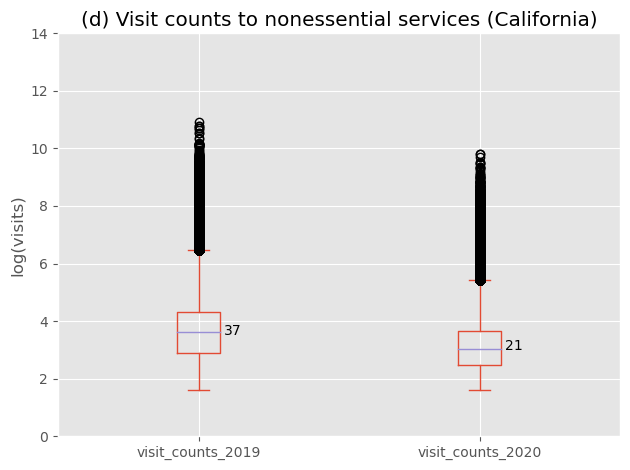

37.0
21.0


In [109]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12, 8), dpi=80)
ax = nes19_20[['visit_counts_2019', 'visit_counts_2020']].plot(kind='box')
plt.ylabel('log(visits)')
# Display the plot
plt.title('(d) Visit counts to nonessential services (California)')
ax.set_ylim(0,14)
plt.tight_layout()
text(1.09, 3.5, '37', fontsize=10)
text(2.09, 3.0, '21', fontsize=10)
plt.savefig('CA_rawvisits_ness.tiff', bbox_inches = 'tight', dpi=300)
 

plt.show()

print(CA_nonessential_2019['raw_visit_counts'].median())
print(CA_nonessential_2020['raw_visit_counts'].median())

<Figure size 960x640 with 0 Axes>

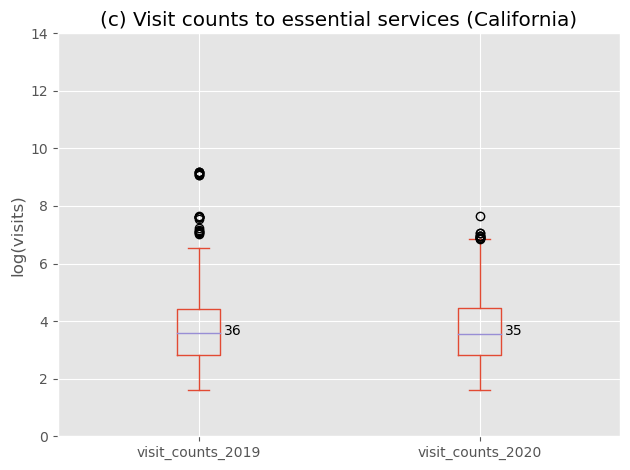

36.0
35.0


In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8), dpi=80)

ax = es19_20[['visit_counts_2019', 'visit_counts_2020']].plot(kind='box', title='Visit counts to essential services (California)')

plt.ylabel('log(visits)')

# Display the plot
plt.title('(c) Visit counts to essential services (California)')
ax.set_ylim(0,14)
plt.tight_layout()
text(1.09, 3.5, '36', fontsize=10)
text(2.09, 3.5, '35', fontsize=10)

plt.savefig('CA_rawvisits_ess.tiff', bbox_inches = 'tight', dpi=300)
plt.show()

print(CA_essential_2019['raw_visit_counts'].median())
print(CA_essential_2020['raw_visit_counts'].median())

In [41]:
CA_nonessential_2019
CA_nonessential_2020

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
2,105,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,14.0,9.0,"[3,0,0,3,0,3,5]",8866.0
5,192,zzw-222@5vg-5r7-c5z,New Hope Community,Religious Organizations,Religious Organizations,38.478253,-121.462456,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,14.0,11.0,"[3,1,1,2,1,2,4]",9680.0
6,223,223-222@5z7-56h-fpv,San Benito High,Elementary and Secondary Schools,Elementary and Secondary Schools,36.840773,-121.404696,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,24.0,15.0,"[6,6,4,7,0,1,0]",3151.0
9,271,zzw-222@5z6-9wt-mp9,Cvusd Peter Pendleton Hs Center,Child Day Care Services,Child Day Care Services,33.668720,-116.187971,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,13.0,8.0,"[2,5,2,1,2,0,1]",5143.0
11,314,zzw-222@5vg-9k3-649,Sequoia Middle,Elementary and Secondary Schools,Elementary and Secondary Schools,37.944504,-122.066434,CA,2020-03-16T00:00:00-07:00,2020-03-23T00:00:00-07:00,14.0,14.0,"[4,7,0,1,1,0,1]",4842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384667,12891892,22b-222@5z4-rpt-9zz,Fourth Street Mill,Restaurants and Other Eating Places,Limited-Service Restaurants,34.101221,-117.769411,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,26.0,26.0,"[2,6,3,3,5,6,1]",4099.0
384668,12891903,zzw-222@5z4-mxt-m6k,Fraker Steven D DDS,Offices of Dentists,Offices of Dentists,34.108722,-117.651835,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,8.0,6.0,"[2,1,1,1,1,1,1]",2023.0
384669,12891958,zzw-222@5z6-3ct-pvz,Fresh Fruit Logistics,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,33.851206,-118.220377,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,59.0,38.0,"[16,12,7,9,9,5,1]",17803.0
384670,12891959,228-222@5z4-zc4-pgk,Rigos Taco 2,Restaurants and Other Eating Places,Full-Service Restaurants,34.179090,-118.430581,CA,2020-04-27T00:00:00-07:00,2020-05-04T00:00:00-07:00,14.0,13.0,"[3,2,2,3,2,0,2]",2530.0
